<a href="https://colab.research.google.com/github/Yonnihayes/hello-world/blob/master/Movie_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Dataset Link: https://www.kaggle.com/c/movie-review-sentiment-analysis-kernels-only/overview

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv
Saving sampleSubmission (1).csv to sampleSubmission (1).csv


In [0]:
import pandas as pd



In [0]:
train = pd.read_csv('train.csv', sep=",")
test = pd.read_csv('test.csv', sep=",")
sample = pd.read_csv('sampleSubmission (1).csv',sep=",")

In [0]:
train

In [0]:
test

In [0]:
sample

In [0]:
test.dtypes

In [0]:
sample.dtypes

In [0]:
train.dtypes

In [0]:
train.shapel

In [0]:
test.shape

In [0]:
sample.shape

In [0]:
train['Sentiment'].value_counts()

In [0]:
sample ['Sentiment'].value_counts()

In [0]:
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS) # <- Spacy's default stop words

In [0]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment,sentiment_label
0,1,1,A series of escapades demonstrating the adage ...,1,Somewhat Negative
1,2,1,A series of escapades demonstrating the adage ...,2,Neutral
2,3,1,A series,2,Neutral
3,4,1,A,2,Neutral
4,5,1,series,2,Neutral


In [0]:
train['sentiment_label'] = ''
train.loc[train.Sentiment == 0, 'sentiment_label'] = 'Negative'
train.loc[train.Sentiment == 1, 'sentiment_label'] = 'Somewhat Negative'
train.loc[train.Sentiment == 2, 'sentiment_label'] = 'Neutral'
train.loc[train.Sentiment == 3, 'sentiment_label'] = 'Somewhat Positive'
train.loc[train.Sentiment == 4, 'sentiment_label'] = 'Positive'

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import nltk
nltk.download('gutenberg')



[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [0]:
from nltk import corcodance
train.concordance("lrb")

In [0]:
import re
import string

In [0]:
def prepare_text(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[%s]' % re.escape(string.digits), '', text)
    text = re.sub('[%s]' % re.escape(' +'), ' ', text)
    text = text.lower()
    text = text.strip()
    return text


In [0]:
train['cleaned_phrase'] = ''
train['cleaned_phrase'] = [prepare_text(phrase) for phrase in train.Phrase]
test['cleaned_phrase'] = ''
test['cleaned_phrase'] = [prepare_text(phrase) for phrase in test.Phrase]


In [0]:
train['phrase_length'] = [len(sent.split(' ')) for sent in train.cleaned_phrase]
test['phrase_length'] = [len(sent.split(' ')) for sent in test.cleaned_phrase]

In [0]:
import scipy
from scipy import sparse

In [0]:
train_phrase_length = sparse.csr_matrix(train.phrase_length)
test_phrase_length = sparse.csr_matrix(test.phrase_length)

In [0]:
import matplotlib.pyplot as plt


In [0]:
Stopwords = list(ENGLISH_STOP_WORDS) + stopwords.words()

In [0]:
def wordcloud(sentiment):
    stopwordslist = Stopwords
    stopwordslist.extend(['movie','movies','film','nt','rrb','lrb','make','work','like','story','time','little'])
    reviews = train.loc[train.Sentiment.isin(sentiment)]
    print("Word Cloud for Sentiment Labels: ", reviews.sentiment_label.unique())
    phrases = ' '.join(reviews.cleaned_phrase)
    words = " ".join([word for word in phrases.split()])
    wordcloud = WordCloud(stopwords=stopwordslist,width=3000,height=2500,background_color='white',).generate(words)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


In [0]:
import wordcloud
from wordcloud import WordCloud


In [0]:
wordcloud([3,4])

TypeError: ignored

In [0]:
wordcloud([2])

In [0]:
wordcloud([0,1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Value')

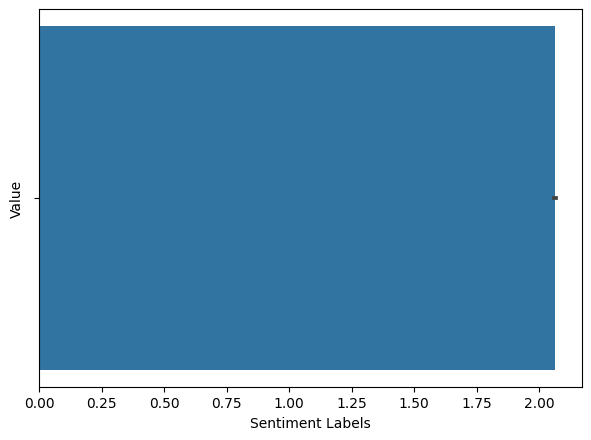

In [0]:
import seaborn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, dpi = 100, figsize = (7, 5))
graph = seaborn.barplot(x='Sentiment', data=train)
ax.set_xlabel('Sentiment Labels')
ax.set_ylabel('Value')

<STRONG>MY NEW DISCOVERIES AS I TORTURED THE DATA SET WITH SIMPLER LINES OF CODE</STRONG>

In [0]:
len(test['Phrase'].unique())
# there are 6692 unique phrases bro

66292

In [0]:
samplesub

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [0]:
lets do exploratory data analysis on the train 

In [0]:
train.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [0]:
# the phrase is already in a data frame format so we dont need to make it a data frame
# preprocessing
# in preprocessing and exploring the data we will do the following:
# 1. Lowercasing
# 2. Punctuation removal
# 3. Stop words removal
# 4. Text standardization
# 5. Spelling correction
# 6. Tokenization
# 7. Stemming
# 8. Lemmatization
# 9. Exploratory data analysis
# 10. End-to-end processing pipeline

In [0]:
# this the phrase 
train['Phrase'].head()

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
Name: Phrase, dtype: object

In [0]:
# lower casing of the phrase has been done in the following format
# if the phrase was not a data frame, the following step would have been performed
# x=train['Phrase']
# x.lower()
# but since its a data frame the following step was used:
train['Phrase']=train['Phrase'].apply(lambda x :" ".join(x.lower() for x in x.split()))
train['Phrase']

0         a series of escapades demonstrating the adage ...
1         a series of escapades demonstrating the adage ...
2                                                  a series
3                                                         a
4                                                    series
                                ...                        
156055                                            hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [0]:
# trying to remove the panctuation,if there are any
train['Phrase']=train['Phrase'].str.replace('[^\w\s]'," ") 
train['Phrase']

0         a series of escapades demonstrating the adage ...
1         a series of escapades demonstrating the adage ...
2                                                  a series
3                                                         a
4                                                    series
                                ...                        
156055                                            hearst  s
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [0]:
# i had to parse this because there was no stopword library available at the moment
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# we are going to remove stopwords now
#  Stop words are very common words that carry no meaning or less meaning compared to other keywords. 
# If we remove the words that are less commonly used, we can focus on the important keywords instead
import nltk
from nltk.corpus import stopwords
stop=stopwords.words('english')
train['Phrase']=train['Phrase'].apply(lambda x:"".join(x for x in x.split() if x not in stop))
train['Phrase']

0         seriesescapadesdemonstratingadagegoodgoosealso...
1                seriesescapadesdemonstratingadagegoodgoose
2                                                    series
3                                                          
4                                                    series
                                ...                        
156055                                               hearst
156056                              forcedavuncularchortles
156057                                    avuncularchortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [0]:
# we are going to standardize the words now.
# what if there is an intial in the phrase
# like for example srs to mean series 
# the following will standardize the srs to series
import re
# i am going to create the use of this after we visualize the words so that we try and tell what
#  the short phrases that could be in the phrase column
# could or would mean
lookup_dict = {'ur':'your', "wbu" : "what about you"}
def text_std(input_text):
   words = input_text.split() 
   new_words = [] 
   for word in words:
     word = re.sub(r'[^\w\s]',"",word)
     if word.lower() in lookup_dict:
       word = lookup_dict[word.lower()]
       new_words.append(word)
       new_text = " ".join(new_words)
       return new_text

In [0]:
text_std(train['Phrase'])

AttributeError: ignored

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
# SPELLING CORRECTION
# This will help us reduce multiple copies of words
import textblob
from textblob import TextBlob
train['Phrase'].apply(lambda x: str(TextBlob(x).correct()))

In [0]:
# tokenization
# tokenizations means splitting text into minimal meaningful units
TextBlob(train['Phrase'][5]).words


WordList(['escapadesdemonstratingadagegoodgoose'])

In [0]:
# Stemming
# stemming is the process of extracting a root word
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['Phrase'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


0    seriesescapadesdemonstratingadagegoodgoosealso...
1            seriesescapadesdemonstratingadagegoodgoos
2                                                 seri
3                                                     
4                                                 seri
Name: Phrase, dtype: object

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
# Lemmatization
#  Lemmatization is a process of extracting a root word by considering the vocabulary.
#  For example, “good,” “better,” or “best” is lemmatized into good. 
from textblob import Word
train['Phrase']=train['Phrase'].apply(lambda x: " ".join([Word(word). lemmatize() for word in x.split()]))
train['Phrase']

0         A series of escapade demonstrating the adage t...
1         A series of escapade demonstrating the adage t...
2                                                  A series
3                                                         A
4                                                    series
                                ...                        
156055                                            Hearst 's
156056                             forced avuncular chortle
156057                                    avuncular chortle
156058                                            avuncular
156059                                              chortle
Name: Phrase, Length: 156060, dtype: object

In [0]:
# exploring the text data in phrase
# to view exactly how many words are in the phrase 
len(train['Phrase'])


156060

In [0]:
# Compute the frequency of all words in the reviews

frequency_dist = nltk.FreqDist(train['Phrase']) 
frequency_dist


FreqDist({'seriesescapadesdemonstratingadagegoodgoosealsogoodganderoccasionallyamusesnoneamountsmuchstory': 1,
          'seriesescapadesdemonstratingadagegoodgoose': 1,
          'series': 11,
          '': 1181,
          'escapadesdemonstratingadagegoodgoose': 2,
          'escapades': 1,
          'demonstratingadagegoodgoose': 1,
          'demonstratingadage': 1,
          'demonstrating': 1,
          'adage': 2,
          'goodgoose': 4,
          'good': 60,
          'goose': 3,
          'alsogoodganderoccasionallyamusesnoneamountsmuchstory': 2,
          'also': 13,
          'goodganderoccasionallyamusesnoneamountsmuchstory': 1,
          'ganderoccasionallyamusesnoneamountsmuchstory': 2,
          'gander': 3,
          'occasionallyamusesnoneamountsmuchstory': 2,
          'occasionally': 2,
          'amusesnoneamountsmuchstory': 1,
          'amuses': 1,
          'noneamountsmuchstory': 2,
          'none': 4,
          'amountsmuchstory': 3,
          'amounts': 1,
 

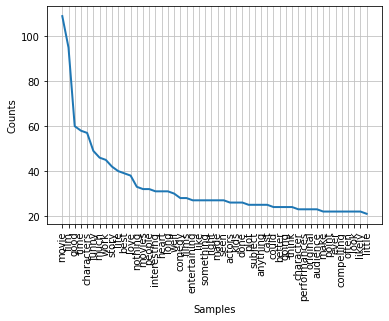

In [0]:
# Let’s take the words only if their frequency is greater than 3.
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words) 
frequency_dist.plot(50,cumulative=False)


(-0.5, 399.5, 199.5, -0.5)

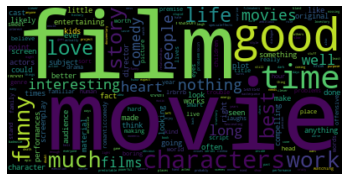

In [0]:
#  Build Wordcloud
# Wordcloud is the pictorial representation of the most frequently repeated words representing the size of the word.
import wordcloud
from wordcloud import WordCloud 
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

# import matplotlib for show
import matplotlib.pyplot as plt 
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off") 

